Random Forest Accuracy: 0.90
KNN Accuracy: 0.90
Decision Tree Accuracy: 0.85
Gradient Boosting Accuracy: 0.91
Logistic Regression Accuracy: 0.91

The model with the best accuracy is Gradient Boosting with an accuracy of 0.91


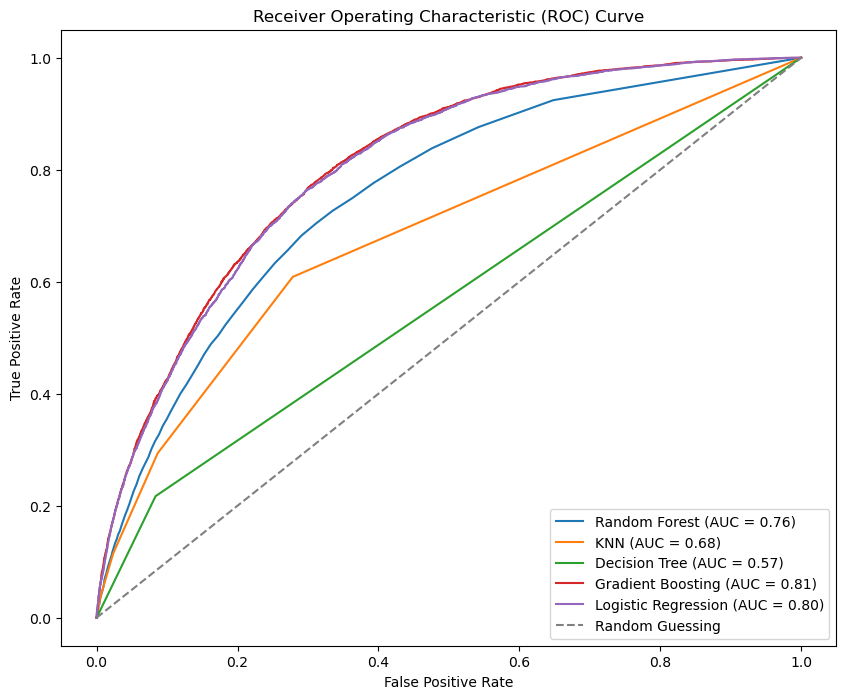

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

data  = pd.read_csv("../Data/heart_disease_training_data.csv")

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
ann = MLPClassifier(random_state=42, max_iter=1000)
logistic_regression = LogisticRegression(random_state=42)

models = [random_forest, knn, decision_tree, gradient_boosting, logistic_regression]
model_names = ['Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Logistic Regression']

accuracies = []
plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy:.2f}")

    # Binarize the target variable
    y_bin = label_binarize(y_test, classes=np.unique(y))

    # For MLPClassifier, get predicted probabilities
    if isinstance(model, MLPClassifier):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_bin.ravel(), y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Identify the model with the best accuracy
best_model_index = np.argmax(accuracies)
best_model_name = model_names[best_model_index]
best_model_accuracy = accuracies[best_model_index]

print(f"\nThe model with the best accuracy is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")

# Plot the ROC curve for random guessing (no skill)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
